# Pruebas de hipótesis con Scipy

Presenta: Juliho Castillo Colmenares

## Instrucciones
**¡Bienvenido a la actividad práctica del módulo!**

### Antes de comenzar

En este archivo pondrás en práctica algunos de los conceptos aprendidos de estadística inferencial, como funciones de probabilidad y pruebas de hipótesis, vamos a trabajar con la librería de scipy y el archivo de marketing_campaign.csv previamente utilizado durante el módulo

### Paso a paso

- Descarga el archivo marketing_campaign.csv. En la sección de Anexos.
- Simula y visualiza una distribución Poisson con parámetro lambda = 2.5 y una muestra de 1000. Esto significa que, en promedio, ocurren 2.5 terremotos de magnitud mayor a 8.5 en la escala de Richter durante un año. Con esta simulación, modela el número de terremotos que pueden ocurrir por año durante los siguientes 1000 años. Este caso es análogo al ejercicio hecho durante la práctica sobre la distribución binomial.
- Usa el set de datos marketing_campaign.csv y realiza una prueba de hipótesis para contrastar si el número de compras en línea (NumWebPurchases) tiene alguna relevancia con el número de visitas a la página web (NumWebVisitsMonth). 
- Agrupa la información en dos categorías: clientes con alto número de visitas (> 5) y bajo número de visitas (≤ 5). Realiza una prueba ANOVA para este análisis.


## ¿Cómo presentar su entrega?

Un Jupyter Notebook (archivo de extensión .ipynb), archivo PDF y capturas de pantallas en espacio de respuesta que muestran tanto el código desarrollado como la solución al problema planteado, incluyendo los comentarios que sean pertinentes a las preguntas que se plantean. 

Las entregas sin estos elementos no serán calificadas. Envía tu archivo al tutor a través de la plataforma EBAC.

**Tiempo estimado de resolución: 40 minutos**

## Parte 1

Simula y visualiza una distribución Poisson con parámetro lambda = 2.5 y una muestra de 1000. Esto significa que, en promedio, ocurren 2.5 terremotos de magnitud mayor a 8.5 en la escala de Richter durante un año. Con esta simulación, modela el número de terremotos que pueden ocurrir por año durante los siguientes 1000 años. Este caso es análogo al ejercicio hecho durante la práctica sobre la distribución binomial.

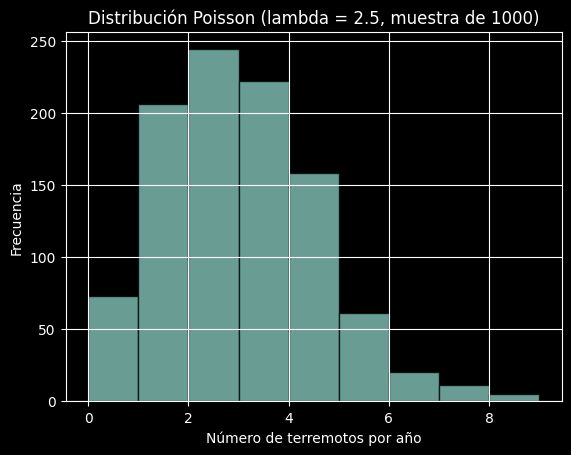

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro lambda para la distribución Poisson
lambda_poisson = 2.5

# Generar una muestra de 1000 valores de la distribución Poisson
sample_size = 1000
poisson_sample = np.random.poisson(lambda_poisson, sample_size)

# Visualizar la distribución usando un histograma
plt.hist(poisson_sample, bins=range(0, max(poisson_sample)+1), alpha=0.75, edgecolor='black')
plt.title('Distribución Poisson (lambda = 2.5, muestra de 1000)')
plt.xlabel('Número de terremotos por año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Parte 2

- Usa el set de datos marketing_campaign.csv y realiza una prueba de hipótesis para contrastar si el número de compras en línea (NumWebPurchases) tiene alguna relevancia con el número de visitas a la página web (NumWebVisitsMonth). 
- Agrupa la información en dos categorías: clientes con alto número de visitas (> 5) y bajo número de visitas (≤ 5). Realiza una prueba ANOVA para este análisis

In [8]:
import pandas as pd
from scipy import stats

# Cargar el conjunto de datos
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

# Agrupar los datos en dos categorías
high_visits = df[df['NumWebVisitsMonth'] > 5]['NumWebPurchases']
low_visits = df[df['NumWebVisitsMonth'] <= 5]['NumWebPurchases']

# Realizar la prueba ANOVA
f_statistic, p_value = stats.f_oneway(high_visits, low_visits)

# Mostrar los resultados
print(f'Estadístico F: {f_statistic}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en el número de compras en línea entre los grupos de alto y bajo número de visitas.")
else:
    print("No podemos rechazar la hipótesis nula: No existe una diferencia significativa en el número de compras en línea entre los grupos de alto y bajo número de visitas.")

Estadístico F: 8.503662361325567
Valor p: 0.003579582330884487
Rechazamos la hipótesis nula: Existe una diferencia significativa en el número de compras en línea entre los grupos de alto y bajo número de visitas.
